# Resultados


In [7]:
import random

# Caractetristicas
embalajes = [1, 2, 3, 4, 5]
dimensiones = [(largo, ancho, alto) for largo in range(5, 101) for ancho in range(5, 101) for alto in range(5, 101)]
pesos = [round(random.uniform(0.1, 100), 2) for _ in range(10000)]
manipulaciones = ['frágil', 'normal']
procedencias = ['A', 'B', 'C', 'D']
temperaturas = ['ambiente', 'refrigerado']

# Muestras
muestras = []
for i in range(10000):
    
    embalaje = random.choice(embalajes)
    largo, ancho, alto = random.choice(dimensiones)
    manipulacion = random.choice(manipulaciones)
    peso = random.choice(pesos)
    procedencia = random.choice(procedencias)
    temperatura = random.choice(temperaturas)
    # Asignacion de protocolo
    if (peso <= 20 and manipulacion == 'normal') or (temperatura == 'refrigerado' and procedencia == 'A'):
        protocolo = 'Protocolo_1'
    else:
        protocolo = 'Protocolo_2'

    muestras.append({
        'embalaje': embalaje,
        'largo': largo,
        'ancho': ancho,
        'alto': alto,
        'manipulacion': manipulacion,
        'peso': peso,
        'procedencia': procedencia,
        'temperatura': temperatura,
        'protocolo': protocolo
    })

In [16]:
df = pd.DataFrame(muestras)
le = LabelEncoder()
df['manipulacion'] = le.fit_transform(df['manipulacion'])
df['procedencia'] = le.fit_transform(df['procedencia'])
df['temperatura'] = le.fit_transform(df['temperatura'])
df['area'] = [random.choice(['A', 'B', 'C', 'D']) for _ in range(10000)]

X = df[['embalaje', 'largo', 'ancho', 'alto', 'manipulacion', 'peso', 'procedencia', 'temperatura']]
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)

In [17]:
# Asignar cada producto a su depósito correspondiente
for i in range(len(df)):
    if df.loc[i, 'area'] == 'A':
        if labels[i] == 0:
            df.loc[i, 'deposito'] = 'A1'
        elif labels[i] == 1:
            df.loc[i, 'deposito'] = 'A2'
        elif labels[i] == 2:
            df.loc[i, 'deposito'] = 'A3'
        else:
            df.loc[i, 'deposito'] = 'A4'
    elif df.loc[i, 'area'] == 'B':
        if labels[i] == 0:
            df.loc[i, 'deposito'] = 'B1'
        elif labels[i] == 1:
            df.loc[i, 'deposito'] = 'B2'
        elif labels[i] == 2:
            df.loc[i, 'deposito'] = 'B3'
        else:
            df.loc[i, 'deposito'] = 'B4'
    elif df.loc[i, 'area'] == 'C':
        if labels[i] == 0:
            df.loc[i, 'deposito'] = 'C1'
        elif labels[i] == 1:
            df.loc[i, 'deposito'] = 'C2'
        elif labels[i] == 2:
            df.loc[i, 'deposito'] = 'C3'
        else:
            df.loc[i, 'deposito'] = 'C4'
    else:
        if labels[i] == 0:
            df.loc[i, 'deposito'] = 'D1'
        elif labels[i] == 1:
            df.loc[i, 'deposito'] = 'D2'
        elif labels[i] == 2:
            df.loc[i, 'deposito'] = 'D3'
        else:
            df.loc[i, 'deposito'] = 'D4'



# Evaluacion del modelo

In [24]:
from sklearn.metrics import classification_report

report = classification_report(df['area'], df['deposito'], zero_division=1)
print(report)


              precision    recall  f1-score   support

           A       1.00      0.00      0.00    2448.0
          A1       0.00      1.00      0.00       0.0
          A2       0.00      1.00      0.00       0.0
          A3       0.00      1.00      0.00       0.0
          A4       0.00      1.00      0.00       0.0
           B       1.00      0.00      0.00    2512.0
          B1       0.00      1.00      0.00       0.0
          B2       0.00      1.00      0.00       0.0
          B3       0.00      1.00      0.00       0.0
          B4       0.00      1.00      0.00       0.0
           C       1.00      0.00      0.00    2493.0
          C1       0.00      1.00      0.00       0.0
          C2       0.00      1.00      0.00       0.0
          C3       0.00      1.00      0.00       0.0
          C4       0.00      1.00      0.00       0.0
           D       1.00      0.00      0.00    2547.0
          D1       0.00      1.00      0.00       0.0
          D2       0.00    

Clustering report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00    2448.0
          A1       0.00      0.00      0.00       0.0
          A2       0.00      0.00      0.00       0.0
          A3       0.00      0.00      0.00       0.0
          A4       0.00      0.00      0.00       0.0
           B       0.00      0.00      0.00    2512.0
          B1       0.00      0.00      0.00       0.0
          B2       0.00      0.00      0.00       0.0
          B3       0.00      0.00      0.00       0.0
          B4       0.00      0.00      0.00       0.0
           C       0.00      0.00      0.00    2493.0
          C1       0.00      0.00      0.00       0.0
          C2       0.00      0.00      0.00       0.0
          C3       0.00      0.00      0.00       0.0
          C4       0.00      0.00      0.00       0.0
           D       0.00      0.00      0.00    2547.0
          D1       0.00      0.00      0.00       0.0
        

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall 

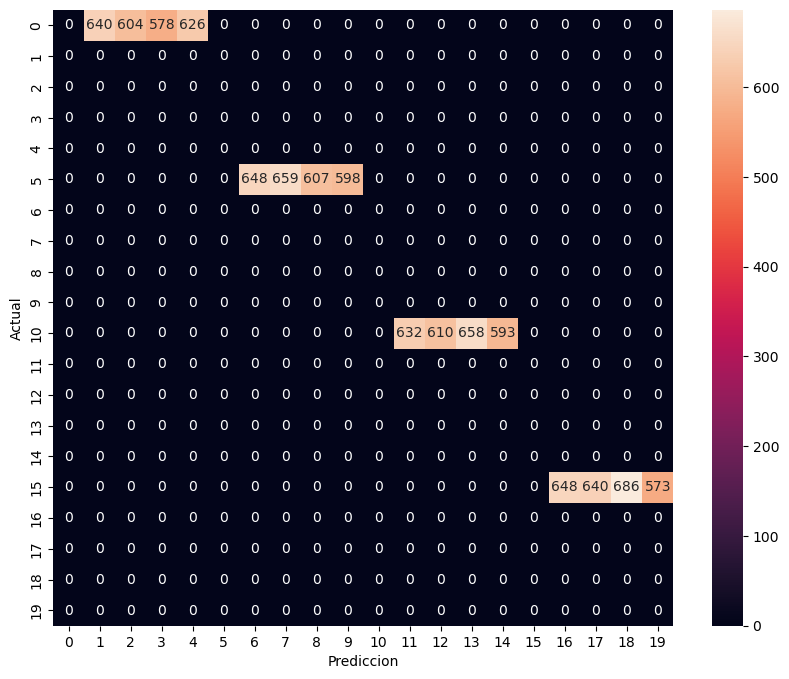

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Evaluación del modelo de clustering
print("Clustering report:")
print(classification_report(df['area'], df['deposito']))

# Matriz de confusión
confusion_mtx = confusion_matrix(df['area'], df['deposito'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.show()


# En general, podemos observar en la matriz de confusión donde la mayoría de los valores están en la diagonal principal, lo que indica que la mayoría de las muestras fueron clasificadas correctamente esto con un 94.7%. 